# This is Asg8 of CS3100, Fall 2022. Those questions below where you just follow-along are game for asking (with small variations) in the final exam.

# **Please search for RESPONSE and you will find the place to enter responses**

### Q1) First, you'll learn what BDDs are, and how to enter and build them. In fact, this part will be done in class, so nothing for you to do but follow (and record your understanding). *But whether you follow or not may be tested via questions in the final exam.*

### Q2) Second, you'll learn how to convert a Boolean formula to CNF via BDDs. The classical method is first illustrated. In fact, this part will be done in class, so nothing for you to do but follow + record your understanding.

### Q3) Third, you'll learn how to obtain CNF from DNF via BDDs. This method will be illustrated for you (including checking for equivalence). Please follow along + record understanding.

### Q4) Next, you'll see how to solve a simple Lewis Carroll puzzle using BDDs.  

### **Combined points for Q1-4, Q6 : 25% (5 points per 2-3 line response)** You are given a place to note down your understanding correponding to the "follow along", below. *Look for this cell after Q6.*

### Q5) **This question will be graded for 25\%.** It will ask you to repair a Lewis Carrol puzzle and get a proof by contradiction.

### Q6) **This question exposes you to discovering map coloring using BDDs.** *Follow along.*

### Q7) **This question will be graded for 50\%.** This is where you'll gain additional understanding of the construction in Figure 16.9.


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

sys.path[0:0] = ['./Jove/pbl/python',
                   './Jove/pbl/python/BDD_V2',
                   './Jove/pbl/python/BDD_V2/BDD_V2',
                   './Jove/pbl/python/BDD_V2/BDD_V2/include',
                   './Jove/pbl/python/PyBool',
                   './Jove/pbl/python/PyBool/include',
                   './Jove/pbl/python/PyBool/include/ply'
                ]
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi

Cloning into 'Jove'...
remote: Enumerating objects: 6745, done.
remote: Counting objects: 100% (2111/2111), done.
remote: Compressing objects: 100% (853/853), done.
remote: Total 6745 (delta 1285), reused 1964 (delta 1175), pack-reused 4634 (from 1)
Receiving objects: 100% (6745/6745), 10.65 MiB | 10.80 MiB/s, done.
Resolving deltas: 100% (4290/4290), done.


In [2]:
from BDD import *
from BDD_ite import *
from BDD_ite1 import *
from dot_bdd import *

from PBL_CNF import *
from PBL_NNE import *

from PyBool_algorithms import *
from PyBool_builder import *
from PyBool_dimacs_parse import *
from PyBool_public_interface import *
from PyBool_std_parse import *

from ply import *
from cpp import *
from ctokens import *
from lex import *
from yacc import *
from buildBDD import *
from buildBDDMin import *
from common import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

/content/./Jove/pbl/python/PyBool/include/PyBool_algorithms.py:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
  (lambda expr: expr["type"] is "const"     ,     lambda expr: print_const_expr(expr)),
/content/./Jove/pbl/python/PyBool/include/PyBool_algorithms.py:50: SyntaxWarning: "is" with a literal. Did you mean "=="?
  (lambda expr: expr["type"] is "var"       ,     lambda expr: print_var_expr(expr))  ,
/content/./Jove/pbl/python/PyBool/include/PyBool_algorithms.py:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
  (lambda expr: expr["type"] is "neg"       ,     lambda expr: print_neg_expr(expr))  ,
/content/./Jove/pbl/python/PyBool/include/PyBool_algorithms.py:52: SyntaxWarning: "is" with a literal. Did you mean "=="?
  (lambda expr: expr["type"] is "and"       ,     lambda expr: print_and_expr(expr))  ,
/content/./Jove/pbl/python/PyBool/include/PyBool_algorithms.py:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
  (lambda expr: expr["type"] is "or"  

# **------The questions Q1-Q7 mentioned above (including the "follow along" ones) are found after these tutorial sections------**



# Here is the language specification for using BDDs


Tyler Sorensen
February 18, 2012
University of Utah

This file contains the Specs for the standard input language of PyBool
It was implemented using the ply python package and all code can
be found in the file PyBool_std_parse.py.


-------------------------------------------------------------
---Legal Operators-------------------------------------------
-------------------------------------------------------------

The legal operators are:

And -            noted: &
Or -             noted: |
logically equal- noted: <=>
implies -	 noted: =>
not -		 noted: ~
Exclusive or -	 noted: XOR
Parenthesis  -   noted: ( )

They corespond to their usual meaning in Boolean Algebra

-------------------------------------------------------------
---Key Words-------------------------------------------------
-------------------------------------------------------------

The following are keywords that cannot be used as variable
names along with a brief description

Var_Order
Used in declaring the variable ordering

Main_Exp
Used in identifying the expression to consider

XOR
the exclusive or operator

-------------------------------------------------------------
---Key Words and Variables-----------------------------------
-------------------------------------------------------------

Variables, much like any other language are a string of characters.

The restrictions on variable names are the following:

-Cannot start with a symbol or a 0 or 1 (must start with a letter)

-Cannot be a keyword

There are two types of variables, literal variables and formula
variables.

Literal variables hold a 0 or a 1

Formula variables hold an expression and are declared simply by assigning
them.

-------------------------------------------------------------
--Variable Declaration---------------------------------------
-------------------------------------------------------------

-Literal Variables and Var_Order

Some applications of Boolean formula require an explicit variable
ordering to be declared. This is what the Var_Order keyword is for.
To explicity declare a variable order, simply write
Var_Order : List_of_Variables

example:
Var_Order : x1 x2 x3

You are not limited to one Var_Order statement, as you might want
to add variables later on, just don't repeat variable declarations.

-Formula Variables

To declare a formula variable, simply use the assignment operator '='
For example, if you wanted the variable X to hold the following formula:
x1 & x2 & ~x3 you would simply write the line:

X = x1 & x2 & ~x3

Now X can be used in other formulas in place of x1 & x2 & ~x3

-------------------------------------------------------------
--Main_Exp---------------------------------------------------
-------------------------------------------------------------

Once you have all your expression written, you need to tell the
BDD which expression you actually want solved. It can be useful
to have many "sub" expression but only solve certain combinations
of them at a time. This is done with the Main_Exp keyword.

Say you have two formulas stored in X1 and X2 and you want to
solve the conjunction of the formulas, you would write:

Main_Exp : X1 & X2

Notice how Main_Exp is followed by a ':'

In general Main_Exp is

Main_Exp : expression

where expression is any valid expression consisting of literals,
literal variables or formula variables.

-------------------------------------------------------------
--Msc--------------------------------------------------------
-------------------------------------------------------------

A few final points:

Comments are started with a # symbol will render the rest
of the line as a comment.

Semi Colons are ignored, so if it is your style to end lines with
a semi colon, please do so.

-------------------------------------------------------------

## **--Putting it all together - an Example follows--**

### **We first enter a Boolean formula, as shown under (1) below.**

### **We then obtain the BDD, as shown under (2) below.**

## **(1) ex1 below shows how you enter a Boolean formula.**

# Q1) Learn what BDDs are, and how to enter and build them.

In [3]:
ex1 = '''
Var_Order : a b c d
exp      = a | (b&c&d)
Main_Exp :  exp
'''


## **This is how you plot the formula ex1 defined above.**

### *You may change the width=300 to another value, to obtain a decent-looking BDD.*

### *You may save a png by right-clicking on the BDD image.*

bdd in dot file {'u': 5, 'n': 4, 'h_table': {(4, 0, 1): 2, (3, 0, 2): 3, (2, 0, 3): 4, (1, 4, 1): 5}, 't_table': {0: (5, None, None), 1: (5, None, None), 2: (4, 0, 1), 3: (3, 0, 2), 4: (2, 0, 3), 5: (1, 4, 1)}, 'var_order': ['a', 'b', 'c', 'd'], 'expr': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'var', 'name': ('b', 0)}, 'expr2': {'type': 'var', 'name': ('c', 0)}}, 'expr2': {'type': 'var', 'name': ('d', 0)}}}}
filename in dot bdd_22_14_18.dot
dot printed
Satisfying string is Number of satisfying assignments: 9
Number of Variables : 4
Number of Nodes     : 6
Variable Ordering
------------------------------------
['a', 'b', 'c', 'd']

All satisfying assignments:
------------------------------
[0, 1, 1, 1]
[1, 1, 1, 1]
[1, 0, 1, 1]
[1, 1, 0, 1]
[1, 1, 1, 0]
[1, 0, 0, 1]
[1, 0, 1, 0]
[1, 1, 0, 0]
[1, 0, 0, 0]



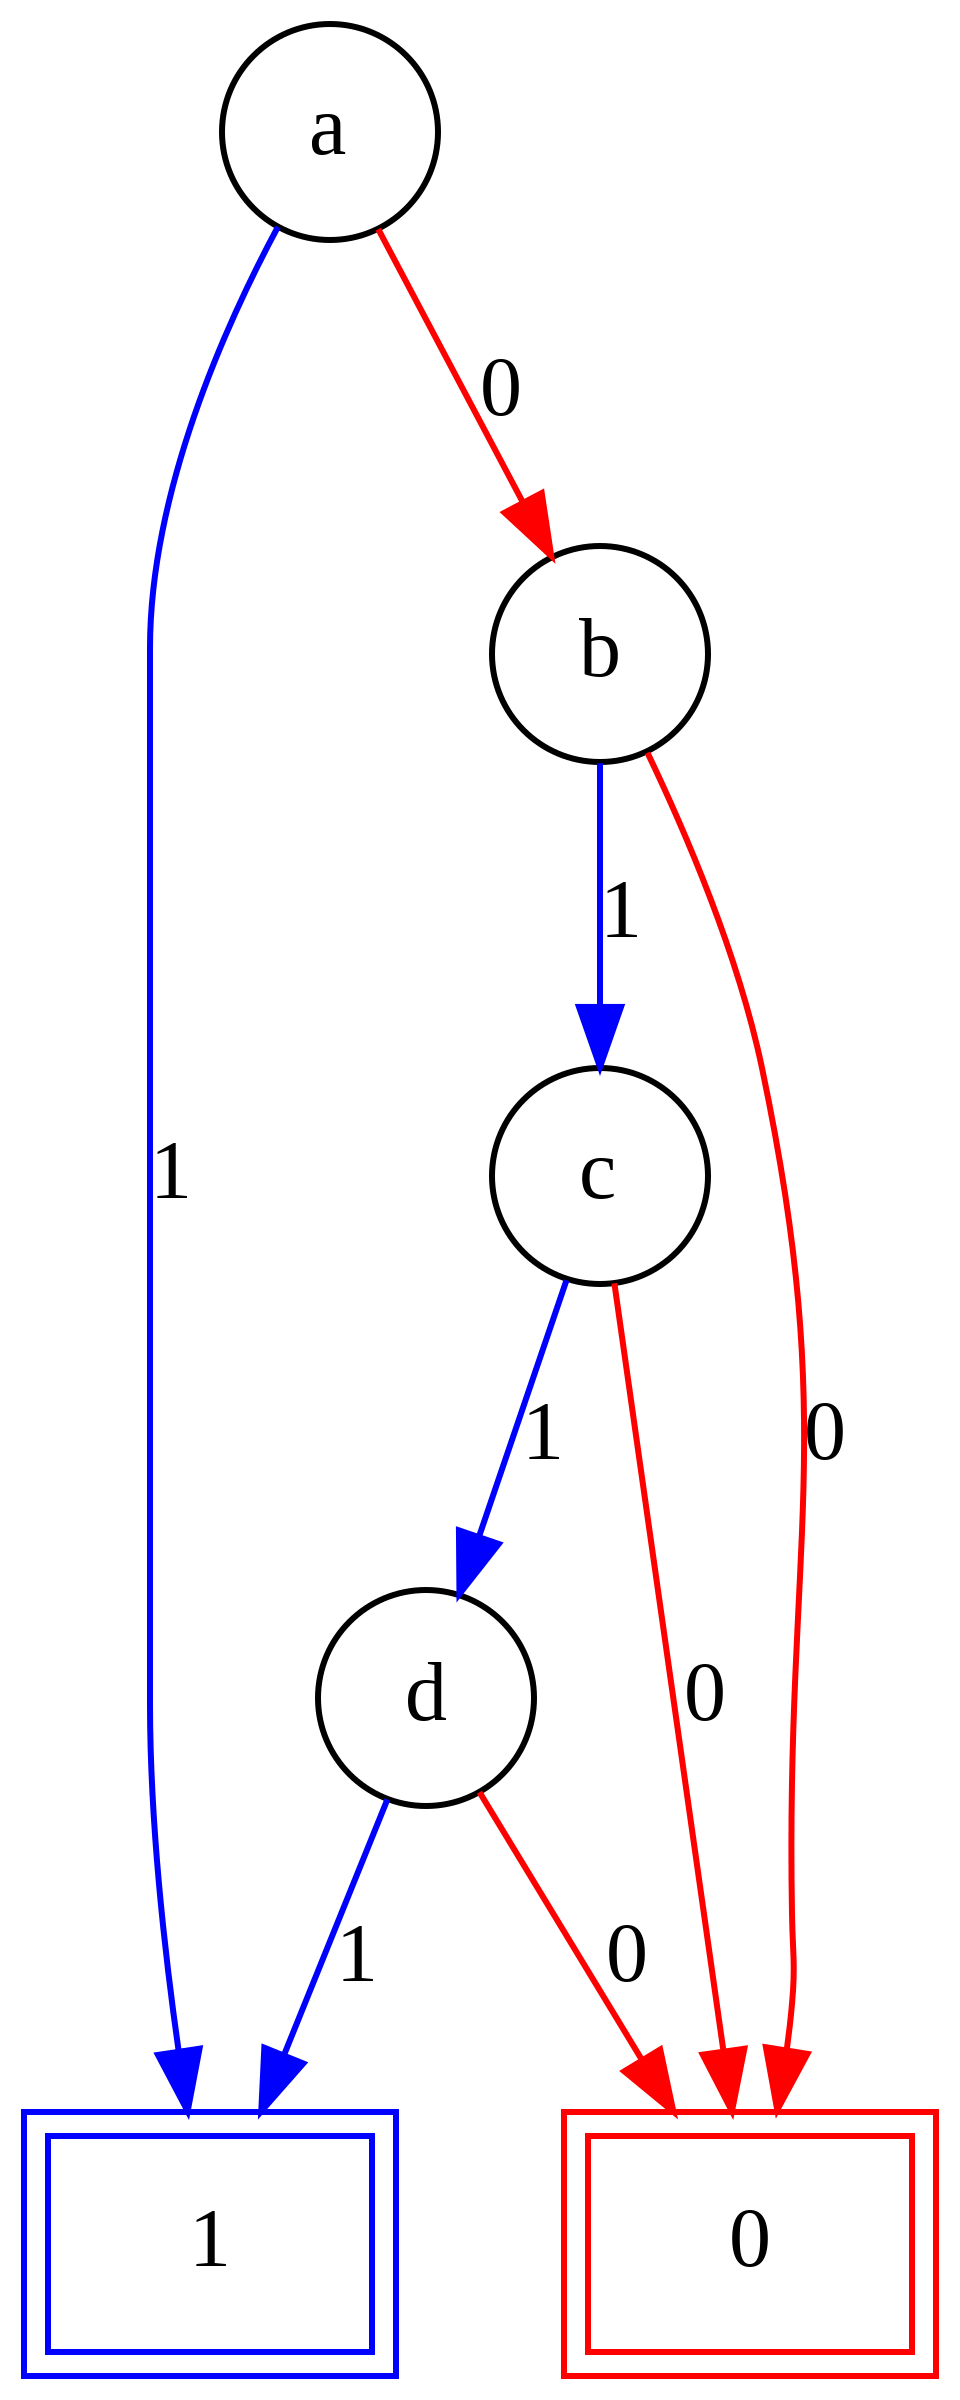

In [4]:
buildBDDmain(ex1.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=150)

# Q2) Converting a DNF formula to CNF classically

## As per Boolean algebra , a | (b & c) = (a | b) & (a | c)

## Thus, a | (b & c & d) becomes (a | b) & (a | c) & (a | d)  

## We check that exp and exp_cnf_classic are equivalent

# **Hugely important point: please comment on this in your 2-3 line answers**

## 1) It is possible to "cheat" on NP-completeness proofs by changing a CNF formula to a DNF formula by applying similar distribution. And DNF satisfiability is linear-time.

## 2) This makes the formulae exponentially bigger. Then getting a linear proof over an exp input is pointless.

## 3) This is a deeper topic but at least keep the input encoding size in mind!

## For instance (a+b+c+d).(e+f+g+h).(i+j+k+l).(m+n+o+p).(q+r+s+t).(u+v+w+z).(y+z+a1+b1).(a2+b2+c2+d2) when "multiplied out" generates a DNF formula of length 65536!

## Verifying such a bloated formula in linear-time is a skewed metric of complexity. But there is more to this under the heading of "Strong NP-completeness" (outside the scope of this course, and frankly I need to read more on it).

## For now, just be aware that the CNF encoding is critical to capturing the structure of the problem.

# DNF is a "case by case unravelled" CNF, and so the constraints are per product term and not across all the clauses

In [5]:
ex2 = '''
Var_Order : a b c d
exp              = a | (b&c&d)
exp_cnf_classic  = (a|b)&(a|c)&(a|d)

Main_Exp : exp_cnf_classic <-> exp
'''

bdd in dot file {'u': 1, 'n': 4, 'h_table': {}, 't_table': {0: (5, None, None), 1: (5, None, None)}, 'var_order': ['a', 'b', 'c', 'd'], 'expr': {'type': 'eqv', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'var', 'name': ('b', 0)}}, 'expr2': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'var', 'name': ('c', 0)}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'var', 'name': ('d', 0)}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'var', 'name': ('b', 0)}, 'expr2': {'type': 'var', 'name': ('c', 0)}}, 'expr2': {'type': 'var', 'name': ('d', 0)}}}}}
filename in dot bdd_22_14_18.dot
dot printed
Satisfying string is Number of satisfying assignments: 16
Number of Variables : 4
Number of Nodes     : 2
Variable Ordering
--------------------------

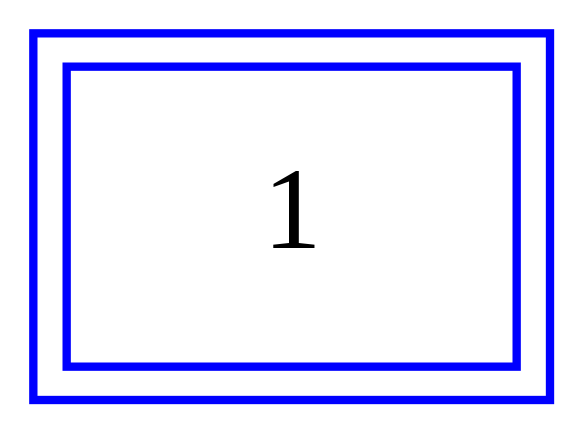

In [6]:
buildBDDmain(ex2.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=300)

# Q3) From a BDD, here is how you get a DNF and a CNF formula

### * Follow each path from the root to the '1' node
### * Conjoin the literals
## * For our example, we have this DNF via BDD:
#  a | (!a & b & c & d)

### * Converting to CNF is done by going to the "0" node from the root
### * and for each edge, if that edge is a 0, keep the same variable
### * and if that edge is a 1, negate the variable
### * and collect the edges via "OR"s
###   (because of the implicit DeMorgan's Law as explained in class)

## * For our example, we have this CNF via BDD:
#  (a | b) & (a | !b | c) & (a | !b | !c | d)


In [7]:
ex3 = '''
Var_Order : a b c d
exp              = a | (b&c&d)
exp_dnf_bdd      = a | (!a & b & c & d)
exp_cnf_bdd      = (a|b)&(a|!b|c)&(a|!b|!c|d)
Main_Exp : (exp_dnf_bdd <-> exp) &  (exp_cnf_bdd <-> exp)
'''

bdd in dot file {'u': 1, 'n': 4, 'h_table': {}, 't_table': {0: (5, None, None), 1: (5, None, None)}, 'var_order': ['a', 'b', 'c', 'd'], 'expr': {'type': 'and', 'expr1': {'type': 'eqv', 'expr1': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('a', 0)}}, 'expr2': {'type': 'var', 'name': ('b', 0)}}, 'expr2': {'type': 'var', 'name': ('c', 0)}}, 'expr2': {'type': 'var', 'name': ('d', 0)}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'var', 'name': ('b', 0)}, 'expr2': {'type': 'var', 'name': ('c', 0)}}, 'expr2': {'type': 'var', 'name': ('d', 0)}}}}, 'expr2': {'type': 'eqv', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'or', 'expr1': {'type': 'var', 'name': ('a', 0)}, 'expr2': {'type': 'var', 'name': ('b', 0)}}, 'expr2': {'type': 'or', '

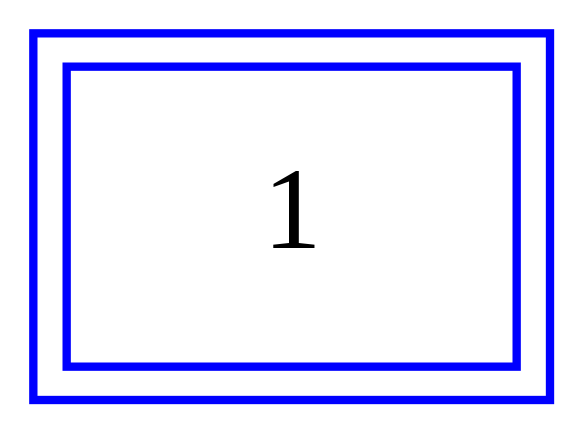

In [8]:
buildBDDmain(ex3.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=300)

# Q4) This is the Babies and Crocodiles example mentioned in Quiz-11
## The proof by contradiction is obtained with ~C added to Main_Exp
## Try also w/o that to see the full BDD (for your practice)

In [9]:
# Babies and crocodiles

BabCroc = '''
#Formula for a simple Lewis Carroll logic puzzle.
#
#The Puzzle is stated as follows:
#Assume that:
#
#All babies are illogical.
#Nobody is despised who can manage a crocodile.
#Illogical persons are despised.
#
#Show that:
#Babies cannot manage crocodiles.

#Declare variables and order
Var_Order : babies illogical despised manageCrocs

#Babies are illogical
P1 = babies => illogical

#illogical people are despised
P2 = illogical => despised

#People who manage crocs are not despised
P3 = manageCrocs => ~despised

#Conclusion: babies cannot manage crocs
C  = babies => ~manageCrocs

#Main expression is all premises with the negation
#of what we're trying to prove. Should have 0 satisfying
#assignments if true.
Main_Exp : P1 & P2 & P3 & ~C
'''

bdd in dot file {'u': 0, 'n': 4, 'h_table': {}, 't_table': {0: (5, None, None), 1: (5, None, None)}, 'var_order': ['babies', 'illogical', 'despised', 'manageCrocs'], 'expr': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'impl', 'expr1': {'type': 'var', 'name': ('babies', 0)}, 'expr2': {'type': 'var', 'name': ('illogical', 0)}}, 'expr2': {'type': 'impl', 'expr1': {'type': 'var', 'name': ('illogical', 0)}, 'expr2': {'type': 'var', 'name': ('despised', 0)}}}, 'expr2': {'type': 'impl', 'expr1': {'type': 'var', 'name': ('manageCrocs', 0)}, 'expr2': {'type': 'neg', 'expr': {'type': 'var', 'name': ('despised', 0)}}}}, 'expr2': {'type': 'neg', 'expr': {'type': 'impl', 'expr1': {'type': 'var', 'name': ('babies', 0)}, 'expr2': {'type': 'neg', 'expr': {'type': 'var', 'name': ('manageCrocs', 0)}}}}}}
filename in dot bdd_22_14_18.dot
dot printed
Satisfying string is Number of satisfying assignments: 0
Number of Variables : 4
Number of Nodes     : 1
Variable Ord

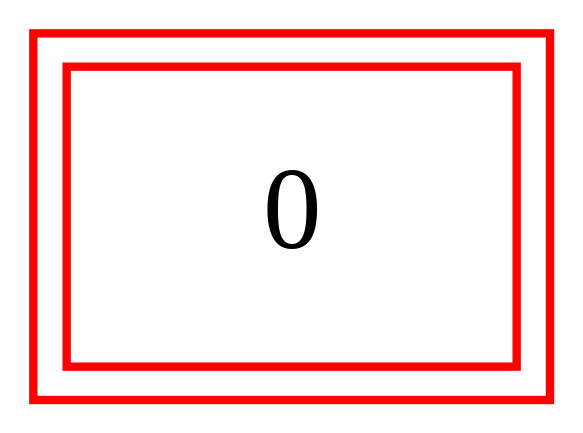

In [10]:
buildBDDmain(BabCroc.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=600)

# Q5) Lewis Carroll's Example of "Wise Young Pigs"
# Also called "Wise Balloonist" in Quiz-11

  First try by setting Extra to 1 (i.e. Extra = 1) and run
  This is a "Forgotten English Fact" that will almost give you
  a 0 node (counterexample) ... but if you read the path, you will
  see that we must have this Extra condition that old <-> ~young.
  Once that is added, we get a full counterexample. This is a neat
  way to teach proofs in a fun way!

In [11]:
# Also called Wise Balloonist

Carroll='''
#Input for a Lewis Carroll problem
#Written in the mark up language for the python BDD manager

#Declare all the variables. Notice how you can use
#more than one line.
Var_Order : eatPennyBuns old young danceTightRopes
Var_Order : pigs respect giddy publicLunch ridiculous
Var_Order : umbrella fat wise balloon

#These are the Premises
P1 = (~danceTightRopes & ~eatPennyBuns) => old
P2 = (pigs & giddy) => respect
P3 = (ridiculous & eatPennyBuns) => ~publicLunch
P4 = (young & balloon) => giddy
P5 = (wise & balloon) => umbrella
P6 = (fat & ridiculous & ~danceTightRopes) => publicLunch
P7 = (wise & giddy) => ~danceTightRopes
P8 = (pigs & umbrella) => ridiculous
P9 = (~danceTightRopes & respect) => fat

# Extra Frame Axiom needed
# A frame axiom in AI is something that humans know but logic might not
# E.g. "All birds can fly... except if their feet are stuck in concrete"
# The frame condition is the "stuck in concrete"
# Like that you have to aim to prove by contradiction only in the presence
# of the extra Frame_Axiom

# YOU WILL NOT get a contradiction initially
# THEN you must look at the BDD and figure out what went wrong
# (what real-world fact you overlooked)
# Incorporate that by changing "1" below to that condition
# Then you ought to get your big red 0 square, showing that
# the contradiction is achieved!

Frame_Axiom = 1 # change this to the right "Frame Axiom"


#This is the conclusion
C = (wise & young & pigs) => ~balloon

#This is all the premises conjoined
P_All = P1 & P2 & P3 & P4 & P5 & P6 & P7 & P8 & P9

#The main expression to be considered.
Main_Exp : P_All & Frame_Axiom & ~C
'''

bdd in dot file {'u': 14, 'n': 13, 'h_table': {(13, 0, 1): 2, (12, 0, 2): 3, (11, 0, 3): 4, (10, 0, 4): 5, (9, 0, 5): 6, (8, 0, 6): 7, (7, 0, 7): 8, (6, 0, 8): 9, (5, 0, 9): 10, (4, 10, 0): 11, (3, 0, 11): 12, (2, 0, 12): 13, (1, 13, 0): 14}, 't_table': {0: (14, None, None), 1: (14, None, None), 2: (13, 0, 1), 3: (12, 0, 2), 4: (11, 0, 3), 5: (10, 0, 4), 6: (9, 0, 5), 7: (8, 0, 6), 8: (7, 0, 7), 9: (6, 0, 8), 10: (5, 0, 9), 11: (4, 10, 0), 12: (3, 0, 11), 13: (2, 0, 12), 14: (1, 13, 0)}, 'var_order': ['eatPennyBuns', 'old', 'young', 'danceTightRopes', 'pigs', 'respect', 'giddy', 'publicLunch', 'ridiculous', 'umbrella', 'fat', 'wise', 'balloon'], 'expr': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'impl', 'expr1': {'type': 'and', 'expr1': {'type': 'neg', 'expr': {'type': 'var

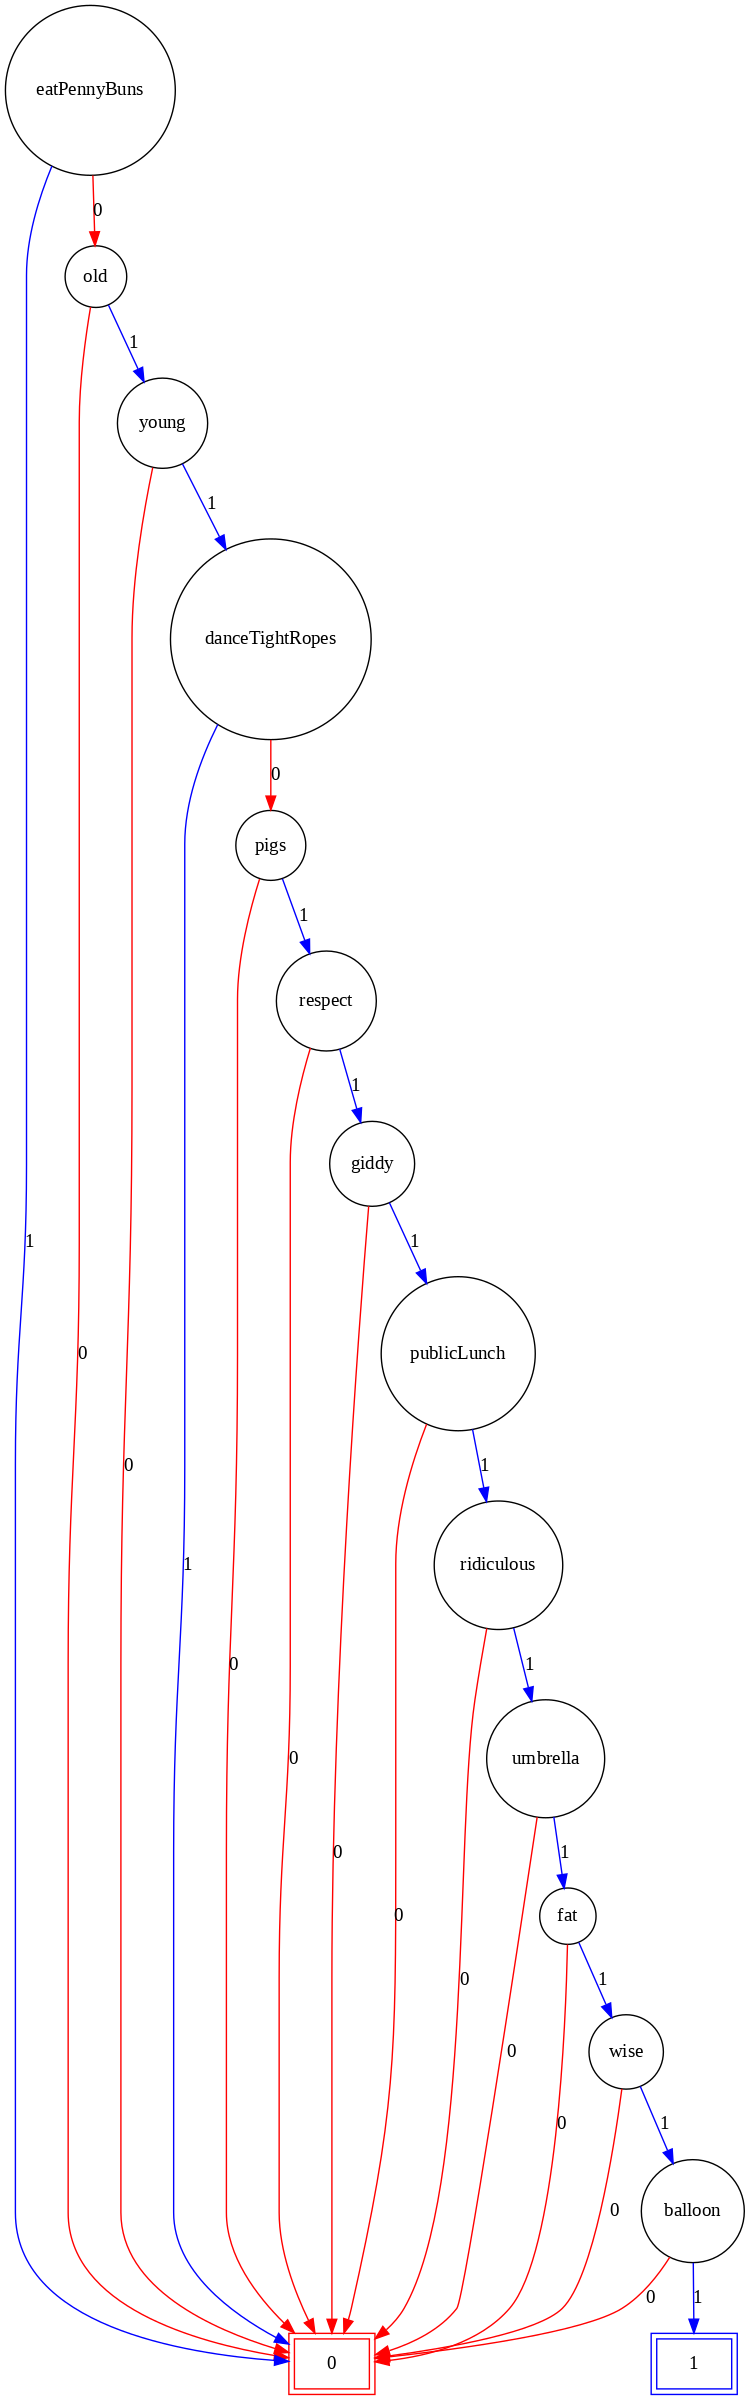

In [12]:
buildBDDmain(Carroll.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=600)

# Repair the above problem by introducing the right extra constraint in "Frame_Axiom" above.

# ** RESPONSE-Q-7: What is the extra clause**

...answer...

# Show that we now get a contradiction

In [13]:
#...Enter a modified code + buildBDDDomain call (maybe in the same code cell) ...
#...to obtain a proof by contradiction for wise young pigs...
#...A big red 0 must result ...

# Q6) This is the "Four Coloring" test where some adjacent states in the USA are listed
# Also consider this as part of Quiz-11
## Specifically, Utah, Nevada, Arizona, and Colorado have 2 bits each
## BDDs compute the coloring by avoiding coloring neighboring states the same
## Read the "0/1" codes for the states as a "color"
## the "aUT" and "bUT" bit bits tell you the "a/b" bits assigned for Utah.
## So on for others


#**Change the variable ordering as indicated below.** *Record your observations!*

In [14]:
FourColoringStates = '''

#--Uncomment the one commented and comment what's uncommented
#--See how it affects the BDD size
#--Explain why this might be

Var_Order : aUT, bUT, aNV, bNV, aAZ, bAZ, aCO, bCO
#Var_Order : aUT, aNV, aAZ, aCO, bUT, bNV, bAZ, bCO

Nv_not_Ut = ~((aNV <=> aUT) & (bNV <=> bUT))
Nv_not_Az = ~((aNV <=> aAZ) & (bNV <=> bAZ))
Az_not_Ut = ~((aUT <=> aAZ) & (bUT <=> bAZ))

Co_not_Az = ~((aCO <=> aAZ) & (bCO <=> bAZ))
Co_not_Ut = ~((aCO <=> aUT) & (bCO <=> bUT))



Main_Exp : Nv_not_Ut & Nv_not_Az & Az_not_Ut & Co_not_Az & Co_not_Ut
'''

bdd in dot file {'u': 48, 'n': 8, 'h_table': {(8, 1, 0): 2, (8, 0, 1): 3, (7, 3, 2): 4, (6, 4, 2): 5, (5, 5, 0): 6, (4, 6, 0): 7, (7, 1, 0): 8, (6, 8, 0): 9, (6, 4, 0): 10, (5, 10, 9): 11, (6, 0, 2): 12, (5, 12, 9): 13, (4, 13, 11): 14, (3, 14, 7): 15, (7, 2, 3): 16, (6, 3, 16): 17, (5, 17, 0): 18, (4, 0, 18): 19, (6, 0, 8): 20, (6, 3, 0): 21, (5, 21, 20): 22, (6, 0, 16): 23, (5, 23, 20): 24, (4, 24, 22): 25, (3, 25, 19): 26, (2, 26, 15): 27, (6, 16, 0): 28, (7, 0, 1): 29, (6, 29, 0): 30, (5, 30, 28): 31, (5, 30, 12): 32, (4, 32, 31): 33, (6, 16, 2): 34, (5, 0, 34): 35, (4, 35, 0): 36, (3, 36, 33): 37, (6, 0, 29): 38, (5, 38, 21): 39, (6, 0, 4): 40, (5, 38, 40): 41, (4, 41, 39): 42, (6, 3, 4): 43, (5, 0, 43): 44, (4, 0, 44): 45, (3, 45, 42): 46, (2, 46, 37): 47, (1, 47, 27): 48}, 't_table': {0: (9, None, None), 1: (9, None, None), 2: (8, 1, 0), 3: (8, 0, 1), 4: (7, 3, 2), 5: (6, 4, 2), 6: (5, 5, 0), 7: (4, 6, 0), 8: (7, 1, 0), 9: (6, 8, 0), 10: (6, 4, 0), 11: (5, 10, 9), 12: (6, 0, 2),

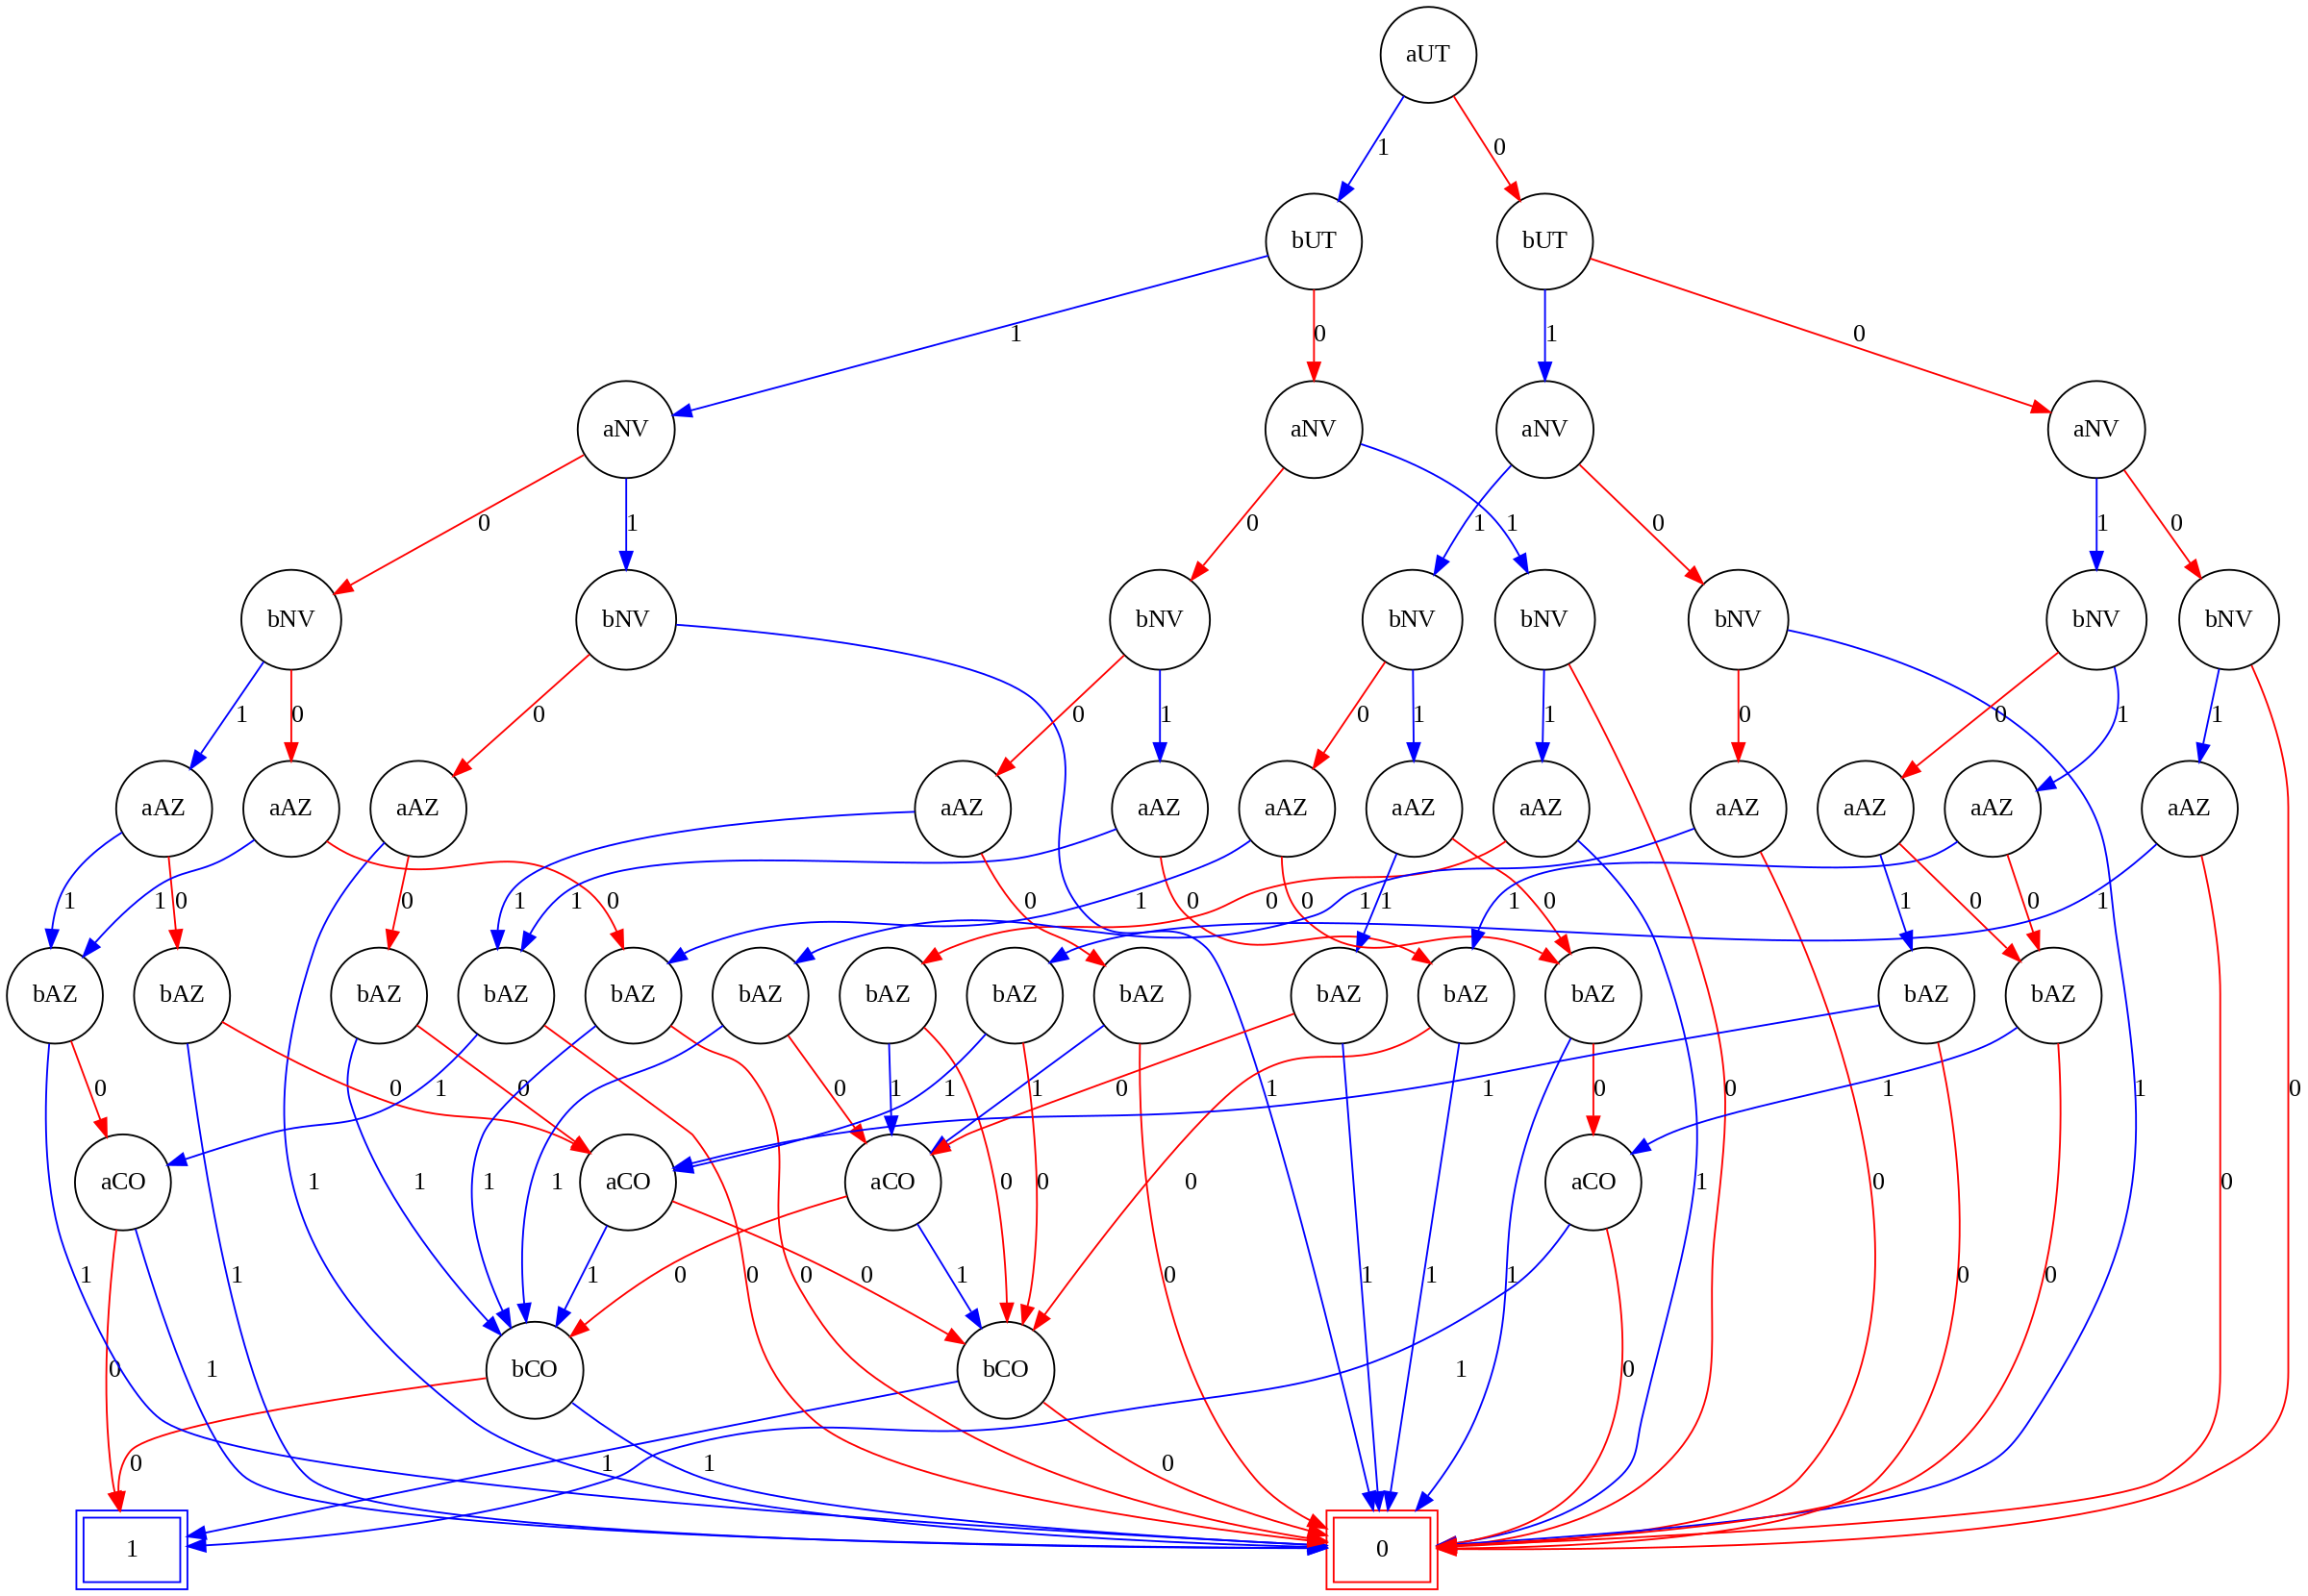

In [15]:
buildBDDmain(FourColoringStates.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=800)

# RESPONSE-Q1-Q6

# **Below, please record about 2-3 lines for each of Q1-Q4, and Q6, capturing your understanding of the illustrations in these "follow along" questions.**

## Q1 response (2-3 lines as stated above)

...Space for Q1...

## Q2 response (2-3 lines as stated above)

...Space for Q2...

## Q3 response (2-3 lines as stated above)

...Space for Q3...

## Q4 response (2-3 lines as stated above)

...Space for Q4...

## Q6 response (2-3 lines as stated above)

...Space for Q6...IN HERE, capture *what the different variable ordering did* to the **BDD size** and why that might be the case...

...Ask on Piazza why that might be the case, and I'll reponse...

...Also read the path from the root to "1" and try to understand that the BDD is setting the two bits of the state colors in different ways. It could be that 11 is red, 10 is blue etc...



# Q7, (50\% of the points) -- enter answers in the space explicitly provided below

## Q7(a): 10 of the 50%: Encode the formula given in Figure 16.9 and show that the formula is unsatisfiable

## Q7(b): 20 of the 50%: Leave out the last clause and find the satisfying instance. Then argue that a 3-clique -- a triangle -- exists in the graph derived for this formula. Write out the triangle by listing its nodes.

## Q7(c): 10 of the 50%: Show that this tests the mapping reduction involved. Describe how it shows that this formula with K clauses is satisfiable if and only if the Graph has a K-clique.

In [24]:
Q7a = '''
Var_Order : x1 x2
c1 = (x1 | x1 | x2)
c2 = (x1 | x1 | !x2)
c3 = (!x1 | !x1 | x2)
c4 = (!x1 | !x1 | !x2)

Main_Exp  : c1 & c2 & c3 & c4
'''


bdd in dot file {'u': 0, 'n': 2, 'h_table': {}, 't_table': {0: (3, None, None), 1: (3, None, None)}, 'var_order': ['x1', 'x2'], 'expr': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'var', 'name': ('x1', 0)}, 'expr2': {'type': 'var', 'name': ('x1', 0)}}, 'expr2': {'type': 'var', 'name': ('x2', 0)}}, 'expr2': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'var', 'name': ('x1', 0)}, 'expr2': {'type': 'var', 'name': ('x1', 0)}}, 'expr2': {'type': 'neg', 'expr': {'type': 'var', 'name': ('x2', 0)}}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('x1', 0)}}, 'expr2': {'type': 'neg', 'expr': {'type': 'var', 'name': ('x1', 0)}}}, 'expr2': {'type': 'var', 'name': ('x2', 0)}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('x1', 0)}}, 'expr2': {'type': 'neg', 'expr': {'type': 'var',

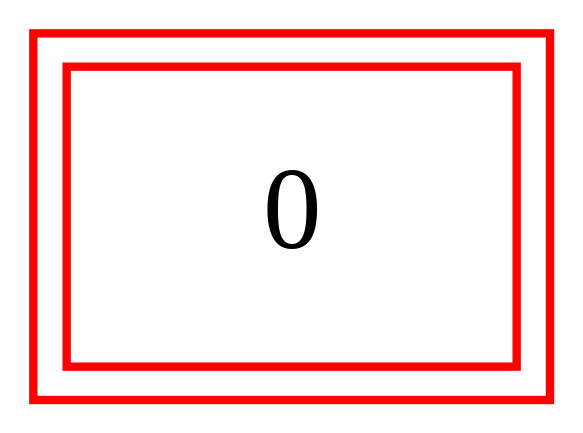

In [25]:
buildBDDmain(Q7a.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=600)

# RESPONSE-Q7a: Write your observations for Q7a below

...answer...

In [27]:
Q7b = '''
Var_Order : x1 x2
c1 = (x1 | x1 | x2)
c2 = (x1 | x1 | !x2)
c3 = (!x1 | !x1 | x2)
# c4 = (!x1 | !x1 | !x2)

Main_Exp  : c1 & c2 & c3 # & c4
'''

bdd in dot file {'u': 3, 'n': 2, 'h_table': {(2, 0, 1): 2, (1, 0, 2): 3}, 't_table': {0: (3, None, None), 1: (3, None, None), 2: (2, 0, 1), 3: (1, 0, 2)}, 'var_order': ['x1', 'x2'], 'expr': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'var', 'name': ('x1', 0)}, 'expr2': {'type': 'var', 'name': ('x1', 0)}}, 'expr2': {'type': 'var', 'name': ('x2', 0)}}, 'expr2': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'var', 'name': ('x1', 0)}, 'expr2': {'type': 'var', 'name': ('x1', 0)}}, 'expr2': {'type': 'neg', 'expr': {'type': 'var', 'name': ('x2', 0)}}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('x1', 0)}}, 'expr2': {'type': 'neg', 'expr': {'type': 'var', 'name': ('x1', 0)}}}, 'expr2': {'type': 'var', 'name': ('x2', 0)}}}}
filename in dot bdd_22_14_18.dot
dot printed
Satisfying string is Number of satisfying assignments: 1
Number of Variables : 2
Number of N

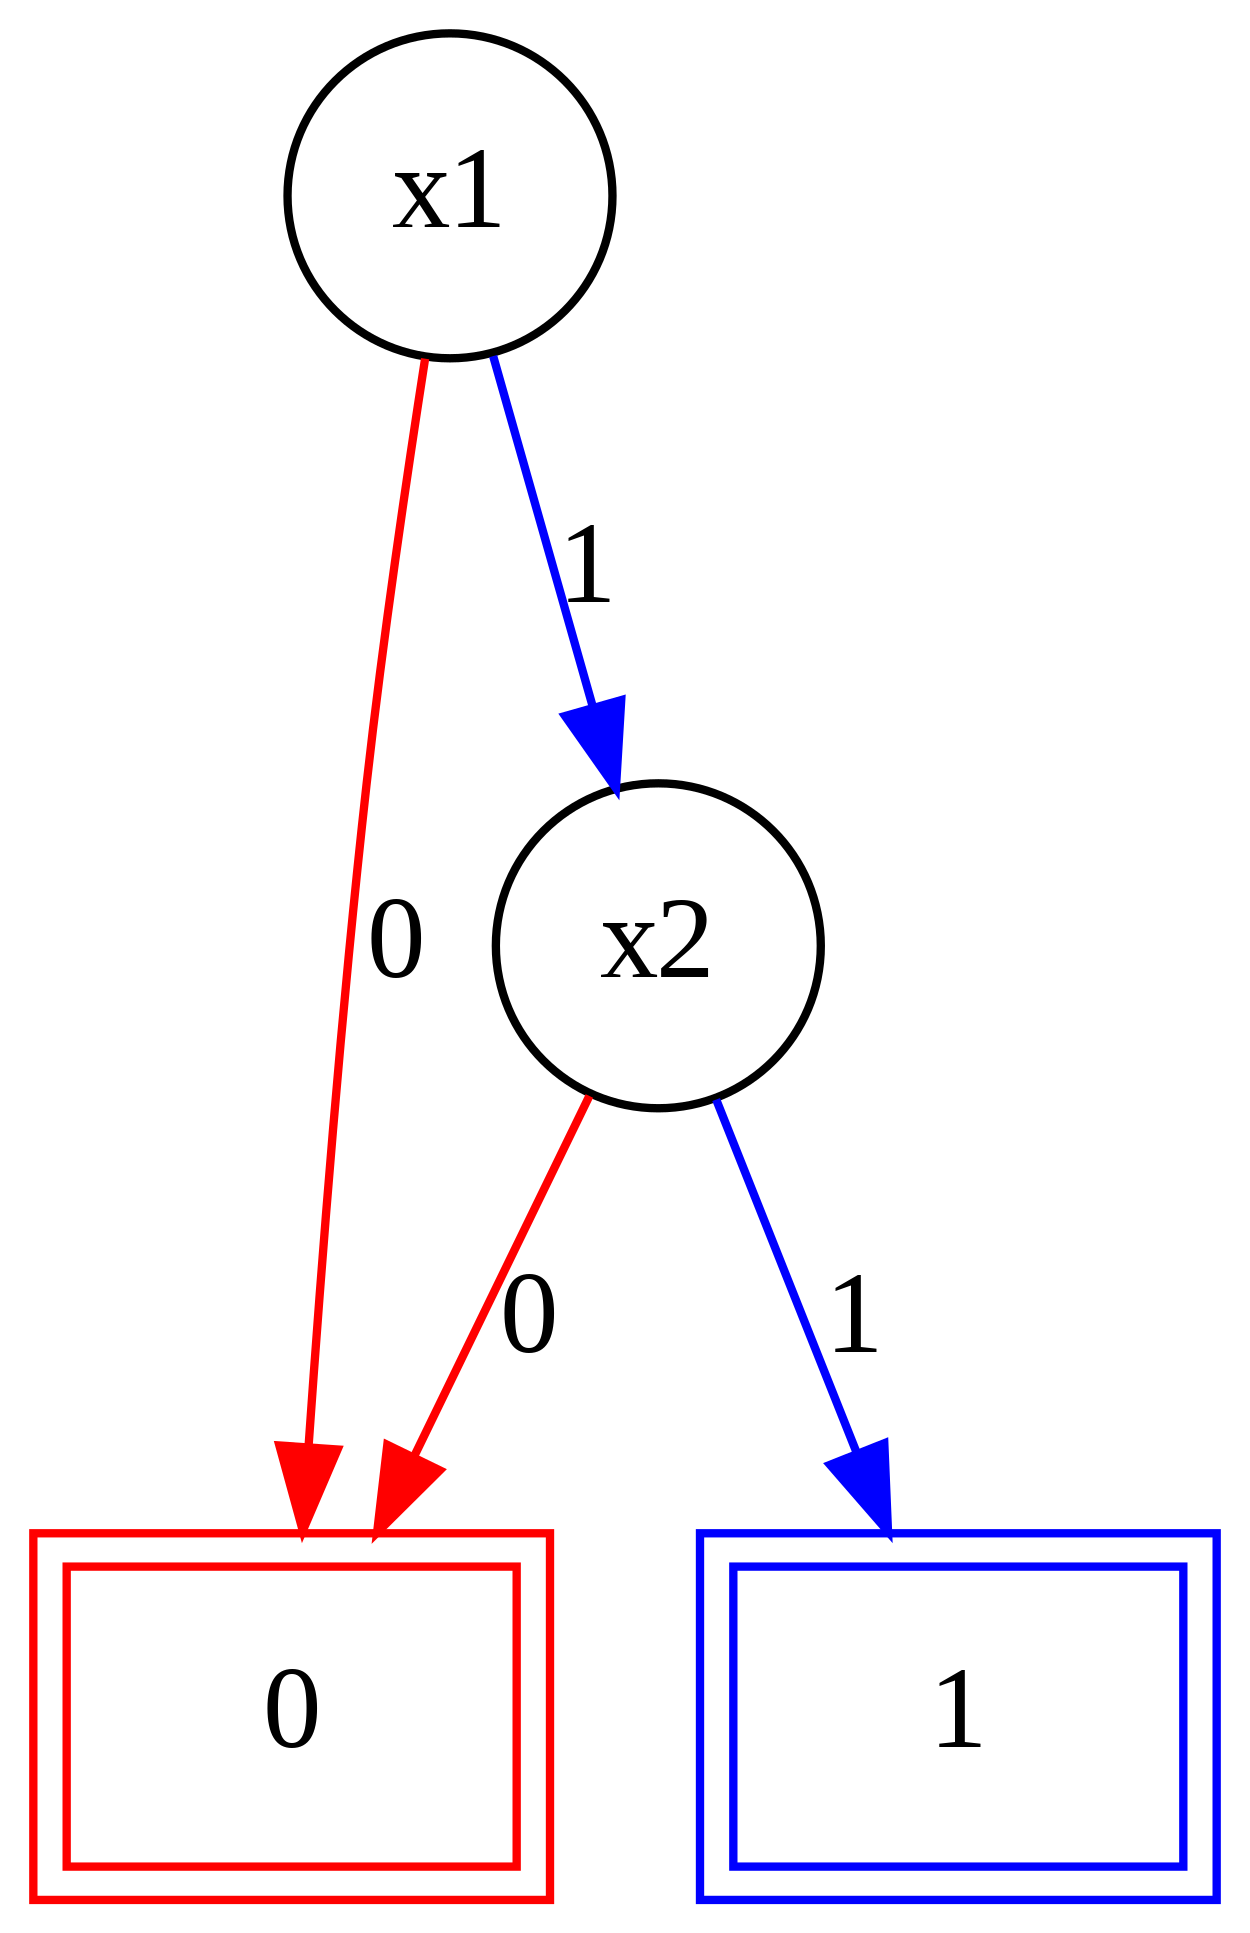

In [28]:
buildBDDmain(Q7b.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=300)

# RESPONSE-Q7-b : Write your observations for Q7b here

...answer...

# List the triangle being formed when the formula in Q7b is satisfied. *Argue in a few lines (2-3) that a mapping reduction is achieved.* **That is, a 3-clique exists IFF ...** . How does this follow from the experiments in Q7a and Q7b?

...answer...

# End